In [2]:
#install QISKIT
!pip install qiskit[visualization]


In [ ]:
import numpy as np
from qiskit import *

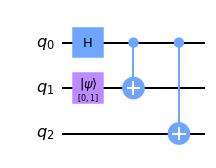

In [8]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)
initial_state = [0,1]   # Define initial_state as |1>
circ.initialize(initial_state, 1) # Apply initialisation operation to the 0th qubit
circ.draw()  # Let's view our circuit
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)
circ.draw('mpl')

In [9]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
circ.add_register(meas.cregs[0])
qc = circ.compose(meas)

#drawing the circuit
qc.draw()


┌───┐                  ░ ┌─┐      
q_0: ───────┤ H ├─────────■────■───░─┤M├──────
     ┌──────┴───┴──────┐┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ┤ Initialize(0,1) ├┤ X ├──┼───░──╫─┤M├───
     └─────────────────┘└───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ────────────────────────┤ X ├─░──╫──╫─┤M├
                             └───┘ ░  ║  ║ └╥┘
c: 3/═════════════════════════════════╩══╩══╩═
                                      0  1  2

In [10]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = backend_sim.run(transpile(qc, backend_sim), shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [11]:
#probability of different quantum states
counts = result_sim.get_counts(qc)
print(counts)

{'101': 524, '010': 500}
